## Importing Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

## Scenario

    1) Prepare a classification model using Naive Bayes for salary data

    Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work
    education	-- Education of an individuals
    maritalstatus -- Marital status of an individulas
    occupation	 -- occupation of an individuals
    
    relationship --
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week
    native -- Native of an individual
    Salary -- salary of an individual


## Loading Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv
Saving SalaryData_Train.csv to SalaryData_Train.csv


In [53]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [54]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [55]:
train_data.shape

(30161, 14)

In [58]:
train_data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [56]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [57]:
test_data.shape

(15060, 14)

In [59]:
test_data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Data Preprocessing

### Combine train and test data for preprocessing


In [60]:
df = pd.concat([train_data,test_data],axis=0)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [61]:
df.shape

(45221, 14)

### Data Cleaning and Label Encoding

In [62]:
cat_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

lbl_encoders = {}

for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  lbl_encoders[col] = le
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [63]:
lbl_encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'maritalstatus': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native': LabelEncoder()}

#### Since, educationno is not giving any relevancy to our dataset so we will drop it

In [64]:
df.drop('educationno',axis=1,inplace=True)
df

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,0,0,3,1,1,5455,0,40,37,<=50K


### Checking Null Values

In [65]:
df.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Basic information checking

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  int64 
 2   education      45221 non-null  int64 
 3   maritalstatus  45221 non-null  int64 
 4   occupation     45221 non-null  int64 
 5   relationship   45221 non-null  int64 
 6   race           45221 non-null  int64 
 7   sex            45221 non-null  int64 
 8   capitalgain    45221 non-null  int64 
 9   capitalloss    45221 non-null  int64 
 10  hoursperweek   45221 non-null  int64 
 11  native         45221 non-null  int64 
 12  Salary         45221 non-null  object
dtypes: int64(12), object(1)
memory usage: 4.8+ MB


In [67]:
df.describe()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503
std,13.217981,0.958132,3.816992,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [68]:
df.dtypes

age               int64
workclass         int64
education         int64
maritalstatus     int64
occupation        int64
relationship      int64
race              int64
sex               int64
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native            int64
Salary           object
dtype: object

### Correlation Analysis

In [69]:
df.corr()

<ipython-input-69-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.085890,-0.003497,-0.271616,-0.004474,-0.247561,0.023781,0.082040,0.079682,0.059426,0.101992,-0.002879
workclass,0.085890,1.000000,0.017852,-0.033217,0.017508,-0.065048,0.049767,0.069633,0.034542,0.008261,0.051366,0.003889
education,-0.003497,0.017852,1.000000,-0.041547,-0.033500,-0.013190,0.011446,-0.027531,0.029893,0.016740,0.060890,0.078800
maritalstatus,-0.271616,-0.033217,-0.041547,1.000000,0.016399,0.180430,-0.070311,-0.119982,-0.042397,-0.034940,-0.183178,-0.022880
occupation,-0.004474,0.017508,-0.033500,0.016399,1.000000,-0.051644,-0.000026,0.056626,0.019435,0.015271,0.016160,-0.002628
relationship,-0.247561,-0.065048,-0.013190,0.180430,-0.051644,1.000000,-0.118588,-0.582977,-0.056817,-0.058485,-0.259194,-0.007016
race,0.023781,0.049767,0.011446,-0.070311,-0.000026,-0.118588,1.000000,0.088949,0.014079,0.020917,0.044739,0.126192
sex,0.082040,0.069633,-0.027531,-0.119982,0.056626,-0.582977,0.088949,1.000000,0.047441,0.046639,0.231427,-0.004653
capitalgain,0.079682,0.034542,0.029893,-0.042397,0.019435,-0.056817,0.014079,0.047441,1.000000,-0.032095,0.083880,0.007641
capitalloss,0.059426,0.008261,0.016740,-0.034940,0.015271,-0.058485,0.020917,0.046639,-0.032095,1.000000,0.054220,0.006484


<ipython-input-70-c6feee9f0a5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


<Axes: >

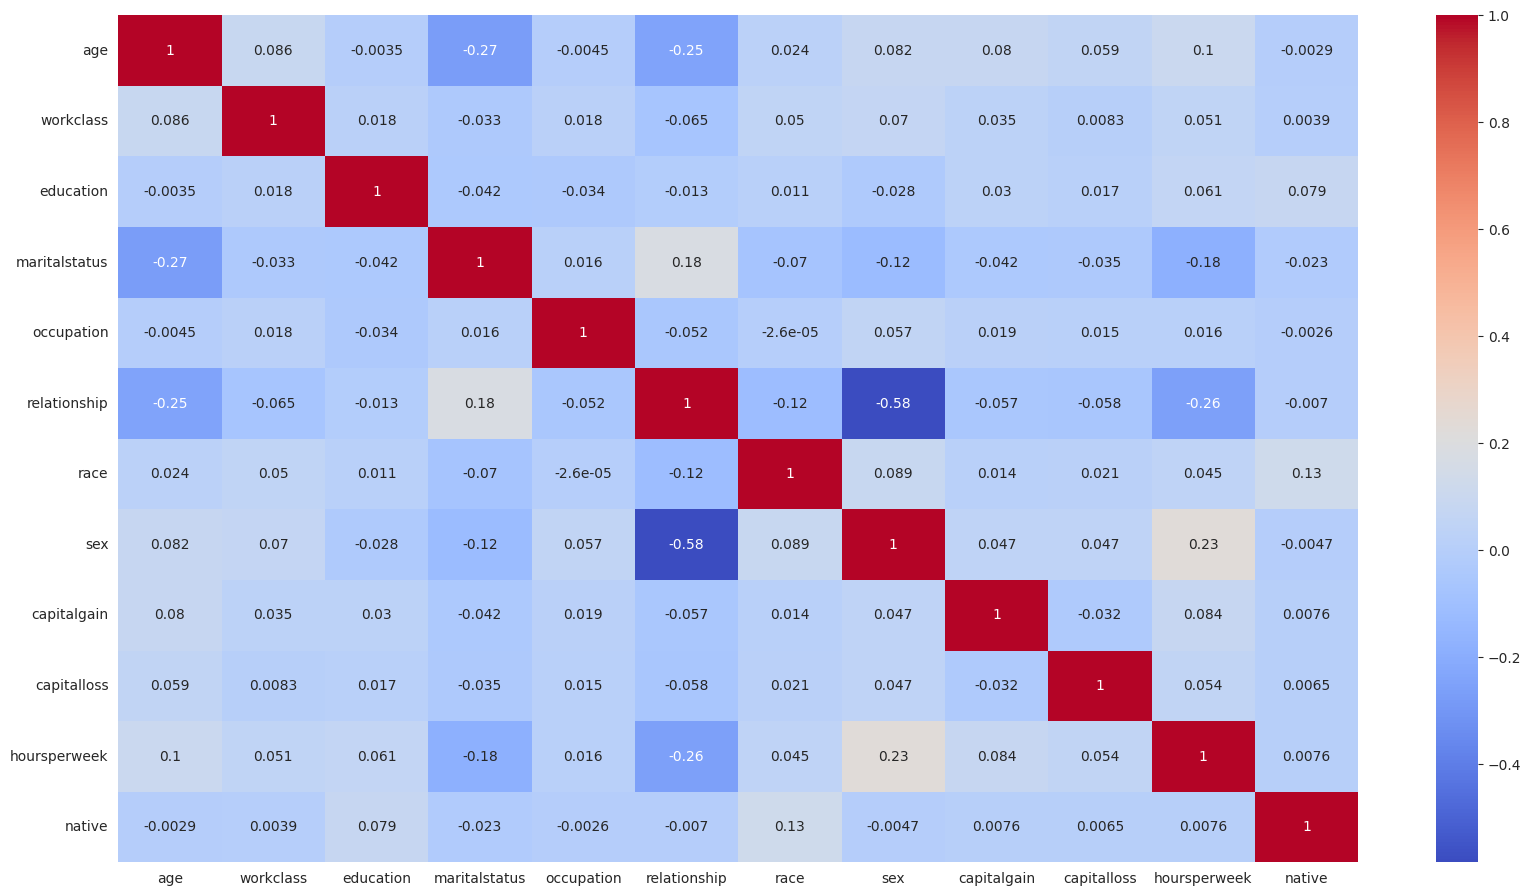

In [70]:
cor_mat = df.corr()

plt.figure(figsize=(20,11))
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')

## Feature Selection

In [71]:
selected_features = ['age', 'workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native']
X = df[selected_features]
X

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,4,1,2174,0,40,37
1,50,4,9,2,3,0,4,1,0,0,13,37
2,38,2,11,0,5,1,4,1,0,0,40,37
3,53,2,1,2,5,0,2,1,0,0,40,37
4,28,2,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37
15056,39,2,9,0,9,1,4,0,0,0,36,37
15057,38,2,9,2,9,0,4,1,0,0,50,37
15058,44,2,9,0,0,3,1,1,5455,0,40,37


## Train Test Split

In [72]:
X_train = X.iloc[ : len(train_data)]
X_test = X.iloc[len(train_data) :]
y_train = train_data['Salary']
y_test = test_data['Salary']



# In order to Encode Target column as well
# X_train = X.iloc[ : len(train_data) , : -1]
# X_test = X.iloc[len(train_data) : , : -1]
# y_train = X.iloc[ : len(train_data) , -1]
# y_test = X.iloc[len(train_data): , -1]

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30161, 12)
(15060, 12)
(30161,)
(15060,)


In [74]:
np.unique(y_train)

array([' <=50K', ' >50K'], dtype=object)

In [75]:
np.unique(y_test)

array([' <=50K', ' >50K'], dtype=object)

# Model Building

## GaussianNB model + Evaluation

In [76]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [77]:
y_pred = model.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [78]:
acurcy = accuracy_score(y_test,y_pred)
print('Accuracy',acurcy)

Accuracy 0.7915006640106241


### Confusion Matrix

In [79]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10784   576]
 [ 2564  1136]]


### Classification Report

In [80]:
cl_report = classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.66      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



### Actual_Salary~Predicted_Salary DataFrame

In [81]:
test_report = pd.DataFrame({'Actual Salary':y_test,'Predicted Salary':y_pred})
test_report

,Actual Salary,Predicted Salary
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,<=50K
3,>50K,>50K
4,<=50K,<=50K
...,...,...
15055,<=50K,<=50K
15056,<=50K,<=50K
15057,<=50K,<=50K
15058,<=50K,>50K


### Visualizations

#### ROC Curve

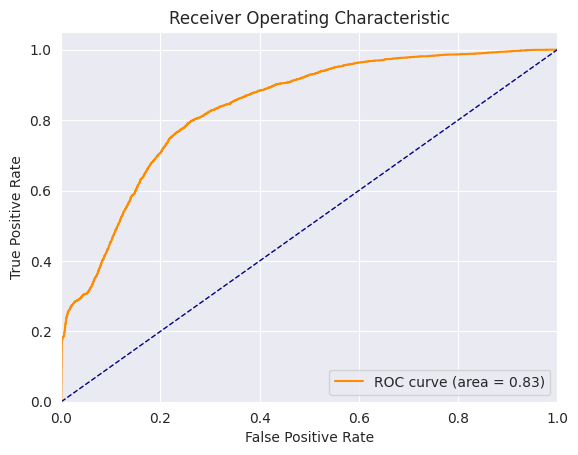

In [83]:
y_probs = model.predict_proba(X_test)[:,1]         # [:,1], probablities for positive class, all rows and second column


y_test = test_data['Salary']
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

fpr, tpr, _ = roc_curve(y_test,y_probs)
roc_auc = auc(fpr,tpr)

sns.set_style(style='darkgrid')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### Precision Recall Curve

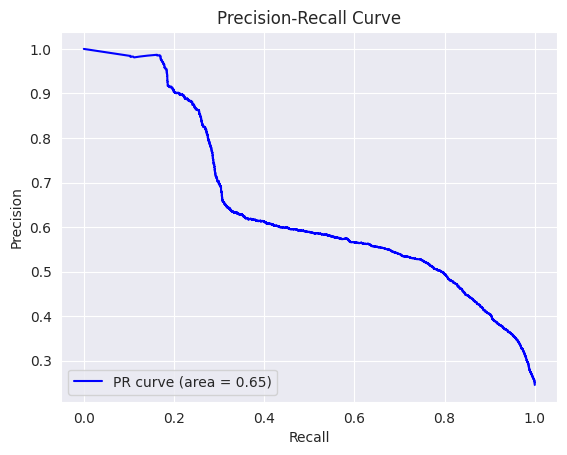

In [84]:
pre, rec, _ = precision_recall_curve(y_test,y_probs)
pr_auc = auc(rec,pre)

plt.plot(rec, pre, color='blue',label='PR curve (area = %0.2f)'%pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

## CategoricalNB Model + Evaluation

### Encoding data for remaining algorithms using One Hot Encoding

In [89]:
X_train_encoded = pd.get_dummies(X_train, columns=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])
X_test_encoded = pd.get_dummies(X_test, columns=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)     already encoded during plotting ROC for GaussianNB
y_test_encoded = y_test
# Now, y_train_encoded and y_test_encoded contain the encoded values


In [90]:
from sklearn.naive_bayes import CategoricalNB

model_cat = CategoricalNB()
model_cat.fit(X_train_encoded, y_train_encoded)


CategoricalNB()

In [92]:
y_pred = model_cat.predict(X_test_encoded)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [93]:
acurcy = accuracy_score(y_test_encoded,y_pred)
print('Accuracy',acurcy)

Accuracy 0.8170650730411687


### Confusion Matrix

In [94]:
cm = confusion_matrix(y_test_encoded,y_pred)
print(cm)

[[9498 1862]
 [ 893 2807]]


### Classification Report

In [95]:
cl_report = classification_report(y_test_encoded,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11360
           1       0.60      0.76      0.67      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.80      0.77     15060
weighted avg       0.84      0.82      0.82     15060



### Actual_Salary~Predicted_Salary DataFrame

In [96]:
test_report = pd.DataFrame({'Actual Salary':y_test_encoded,'Predicted Salary':y_pred})
test_report

,Actual Salary,Predicted Salary
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,1
15058,0,0


### Visualizations

#### ROC Curve

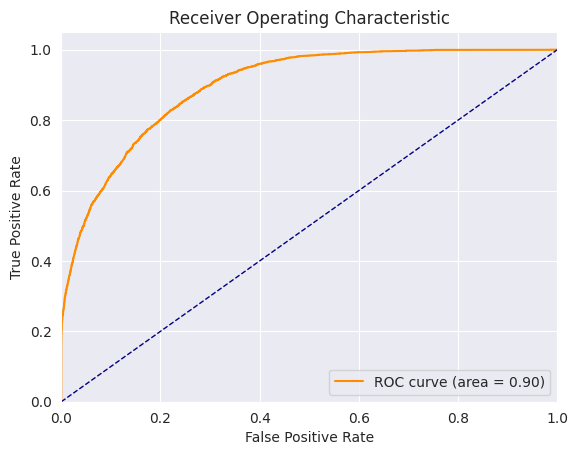

In [99]:
y_probs = model_cat.predict_proba(X_test_encoded)[:,1]         # [:,1], probablities for positive class, all rows and second column

fpr, tpr, _ = roc_curve(y_test_encoded,y_probs)
roc_auc = auc(fpr,tpr)

sns.set_style(style='darkgrid')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### Precision Recall Curve

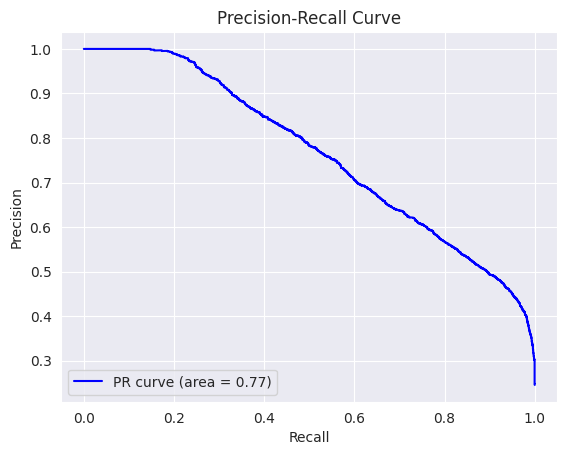

In [100]:
pre, rec, _ = precision_recall_curve(y_test_encoded,y_probs)
pr_auc = auc(rec,pre)

plt.plot(rec, pre, color='blue',label='PR curve (area = %0.2f)'%pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

## MultinomialNB Model + Evaluation

In [101]:
from sklearn.naive_bayes import MultinomialNB

model_multi = MultinomialNB()
model_multi.fit(X_train_encoded, y_train_encoded)


MultinomialNB()

In [102]:
y_pred = model_multi.predict(X_test_encoded)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [103]:
acurcy = accuracy_score(y_test_encoded,y_pred)
print('Accuracy',acurcy)

Accuracy 0.7749667994687915


### Confusion Matrix

In [104]:
cm = confusion_matrix(y_test_encoded,y_pred)
print(cm)

[[10891   469]
 [ 2920   780]]


### Classification Report

In [105]:
cl_report = classification_report(y_test_encoded,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



### Actual_Salary~Predicted_Salary DataFrame

In [106]:
test_report = pd.DataFrame({'Actual Salary':y_test_encoded,'Predicted Salary':y_pred})
test_report

,Actual Salary,Predicted Salary
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,0,1


### Visualizations

#### ROC Curve

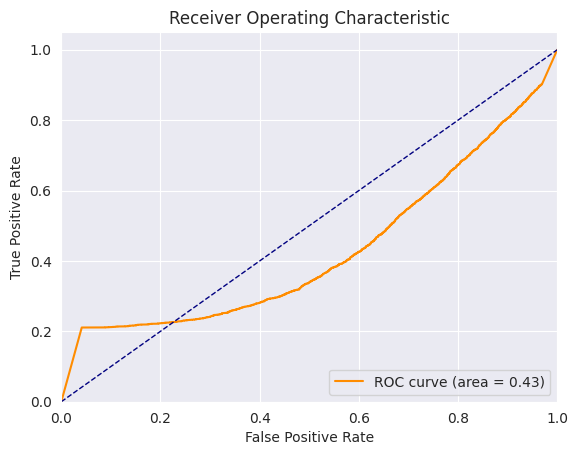

In [107]:
y_probs = model_multi.predict_proba(X_test_encoded)[:,1]         # [:,1], probablities for positive class, all rows and second column

fpr, tpr, _ = roc_curve(y_test_encoded,y_probs)
roc_auc = auc(fpr,tpr)

sns.set_style(style='darkgrid')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### Precision Recall Curve

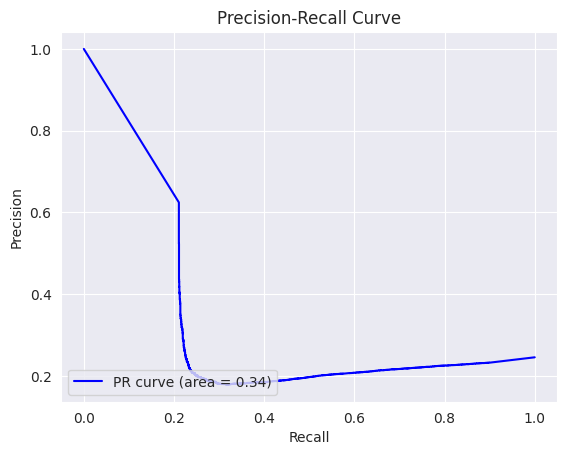

In [108]:
pre, rec, _ = precision_recall_curve(y_test_encoded,y_probs)
pr_auc = auc(rec,pre)

plt.plot(rec, pre, color='blue',label='PR curve (area = %0.2f)'%pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

## BernoulliNB Model + Evaluation

In [109]:
from sklearn.naive_bayes import BernoulliNB

model_bern = BernoulliNB()
model_bern.fit(X_train_encoded, y_train_encoded)

BernoulliNB()

In [110]:
y_pred = model_bern.predict(X_test_encoded)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [111]:
acurcy = accuracy_score(y_test_encoded,y_pred)
print('Accuracy',acurcy)

Accuracy 0.7598273572377158


### Confusion Matrix

In [112]:
cm = confusion_matrix(y_test_encoded,y_pred)
print(cm)

[[8516 2844]
 [ 773 2927]]


### Classification Report

In [113]:
cl_report = classification_report(y_test_encoded,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.92      0.75      0.82     11360
           1       0.51      0.79      0.62      3700

    accuracy                           0.76     15060
   macro avg       0.71      0.77      0.72     15060
weighted avg       0.82      0.76      0.77     15060



### Actual_Salary~Predicted_Salary DataFrame

In [114]:
test_report = pd.DataFrame({'Actual Salary':y_test_encoded,'Predicted Salary':y_pred})
test_report

,Actual Salary,Predicted Salary
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,1
15058,0,0


### Visualizations

#### ROC Curve

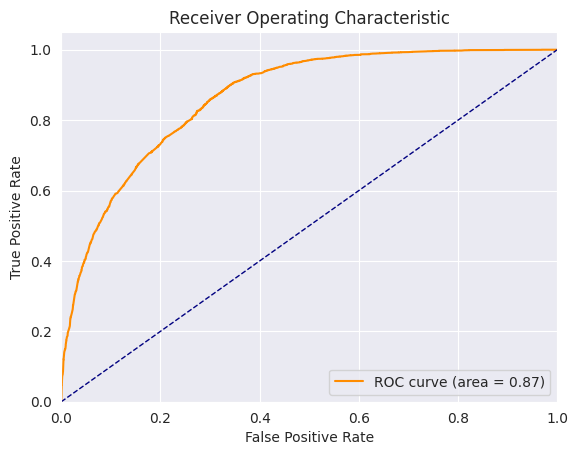

In [115]:
y_probs = model_bern.predict_proba(X_test_encoded)[:,1]         # [:,1], probablities for positive class, all rows and second column

fpr, tpr, _ = roc_curve(y_test_encoded,y_probs)
roc_auc = auc(fpr,tpr)

sns.set_style(style='darkgrid')
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### Precision Recall Curve

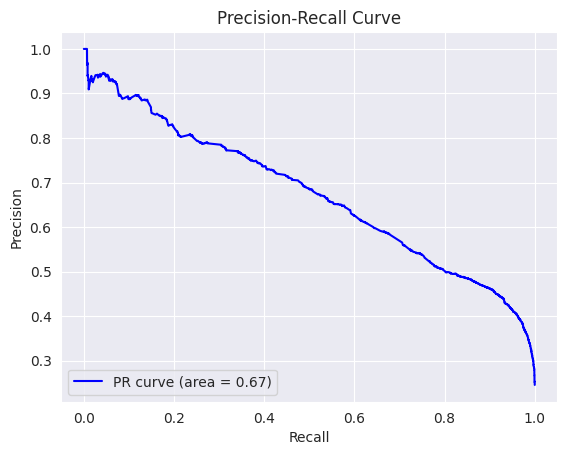

In [116]:
pre, rec, _ = precision_recall_curve(y_test,y_probs)
pr_auc = auc(rec,pre)

plt.plot(rec, pre, color='blue',label='PR curve (area = %0.2f)'%pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

## Conclusion

    While comparig all four classifiers, GaussianNB, CategoricalNB, MultinomialNB, and BernoulliNB the accuracies I got are

    GaussianNB -> 0.7915006640106241
    CategoricalNB -> 0.8170650730411687
    MultinomialNB -> 0.7749667994687915
    BernoulliNB -> 0.7598273572377158

    So, I'll be selecting CategoricalNB as my final model which is the best performing model with 81.70% Accuracy.
    Also, we can see in the ROC curve CategoicalNB is covering maximum area.

    However, MultinomialNB model is very bad model which we can interpret from the ROC curve.

## Additional(For practice only)

In [ ]:
# To re-encode back to categorical values, we have function

X_train_inv = pd.DataFrame()
X_test_inv = pd.DataFrame()


for col in cat_cols:
  le=lbl_encoders[col]
  X_train_inv[col] = le.inverse_transform(X_train[col])
  X_test_inv[col] = le.inverse_transform(X_test[col])
X_train_inv.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
X_test_inv.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States


    By Samit Dhawal